In [1]:
import pydicom
import pandas as pd
import numpy as np
import glob
import filecmp
from nilearn import plotting

# HeuDiConv Intro
In this notebook we are going to start the process of getting the `DICOM` files converted into `.nii` files so that we can use then in our analyses.

## Setup
Before we begin, make sure that you have the correct packages installed. You'll need `heudiconv`, `dcm2niix`, and all of their dependencies. See the [wiki](https://github.com/jacobtfisher/TTU_fMRI_training/wiki/Converting-to-BIDS-Using-HeuDiConv) for a reminder on how to do this. If you are planning on actually running `heudiconv`, make sure that you are on a worker node and not a 

Before we run anything, we'll create a directory that `heudiconv` can use, and set the correct permissions (I've done this already so I've commented it out)

In [ ]:
# ! mkdir ../heudiconv_temp && chmod 775 -R ../heudiconv_temp

Next, we will need to run a bash script that will do a dry-run of `heudiconv`. I've stored this bash script in the file `heudiconv_testrun.sh`, but I've reproduced it here below so we can talk through it. 

## Looking at the `dicominfo`
We have some strange discrepancies in numbers of `DICOM` files across our subjects. Let's look at the `dicominfo.tsv` that heudiconv gives us so that we can see what's going on. 

### Subject 1

In [5]:
dci = pd.read_csv("/lustre/scratch/mzielins/collab_files/heudiconv_temp/.heudiconv/02/info/dicominfo.tsv", sep = "\t")

In [6]:
dci

,total_files_till_now,example_dcm_file,series_id,dcm_dir_name,series_files,unspecified,dim1,dim2,dim3,dim4,...,study_description,referring_physician_name,series_description,sequence_name,image_type,accession_number,patient_age,patient_sex,date,series_uid
0,192,BRADSHAW_8219_2.MR.HEAD_ROUTINE_FMRI_BRAIN.000...,5-t1_mprage_sag_p2_iso_0.9,sub-02,192,NaN,256,256,192,1,...,head^Routine FMRI BRAIN,NaN,t1_mprage_sag_p2_iso_0.9,*tfl3d1_16ns,"('ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM')",NaN,023Y,M,20190802,1.3.12.2.1107.5.2.19.45078.2019080213480340946...
1,388,BRADSHAW_8219_2.MR.HEAD_ROUTINE_FMRI_BRAIN.000...,6-ep2d_pace_moco_run1,sub-02,196,NaN,80,80,41,196,...,head^Routine FMRI BRAIN,NaN,ep2d_pace_moco_run1,*epfid2d1_64,"('ORIGINAL', 'PRIMARY', 'FMRI', 'NONE', 'ND', ...",NaN,023Y,M,20190802,1.3.12.2.1107.5.2.19.45078.2019080213525118450...
2,584,BRADSHAW_8219_2.MR.HEAD_ROUTINE_FMRI_BRAIN.001...,13-ep2d_pace_moco_run2,sub-02,196,NaN,80,80,41,196,...,head^Routine FMRI BRAIN,NaN,ep2d_pace_moco_run2,*epfid2d1_64,"('ORIGINAL', 'PRIMARY', 'FMRI', 'NONE', 'ND', ...",NaN,023Y,M,20190802,1.3.12.2.1107.5.2.19.45078.2019080214000449732...
3,621,BRADSHAW_8219_2.MR.HEAD_ROUTINE_FMRI_BRAIN.002...,22-ep2d_diff_mddw_64_p2,sub-02,37,NaN,128,128,37,1,...,head^Routine FMRI BRAIN,NaN,ep2d_diff_mddw_64_p2_TRACEW,*ep_b1000t,"('DERIVED', 'PRIMARY', 'DIFFUSION', 'TRACEW', ...",NaN,023Y,M,20190802,1.3.12.2.1107.5.2.19.45078.2019080214074771144...


/home/jacobfis/anaconda3/envs/fmri/lib/python3.7/site-packages/nilearn/image/resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


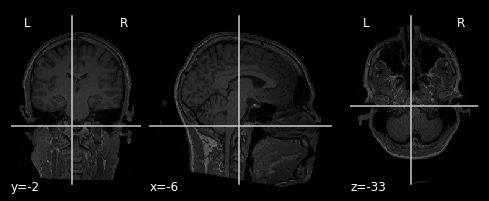

In [2]:
plotting.plot_anat("../bids_nii/sub-01/anat/sub-01_T1w.nii.gz")

In [7]:
!pwd

/lustre/scratch/mzielins/collab_files/code
